In [1]:
# import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

In [2]:
# Load the dataset

data = pd.read_csv("/content/loan_prediction.csv")

In [3]:
# check the first and last rows of the dataset

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# rows and columns
data.shape

(614, 13)

In [6]:
#  descriptive statical analysis

data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.mean()

<ipython-input-7-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64

In [8]:
# dealing with missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [10]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
data['Gender'].fillna("Male",inplace = True)
data['Married'].fillna("Yes",inplace = True)
data['Dependents'].fillna(0,inplace = True)
data['Self_Employed'].fillna("No",inplace = True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace = True)
data['Credit_History'].fillna(1.0,inplace = True)


In [12]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

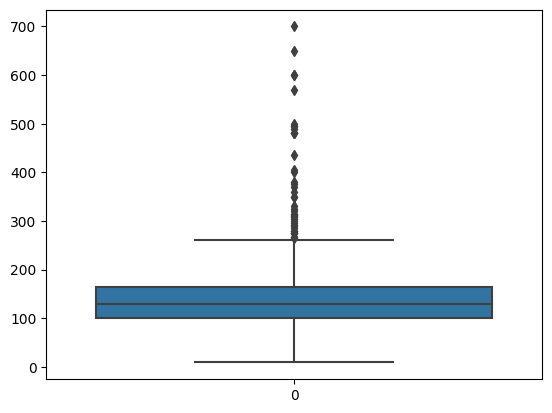

In [13]:
# outliers detection

sns.boxplot(data['LoanAmount'])

In [14]:
data['LoanAmount']=np.where(data['LoanAmount']>260,255,data['LoanAmount'])

<Axes: >

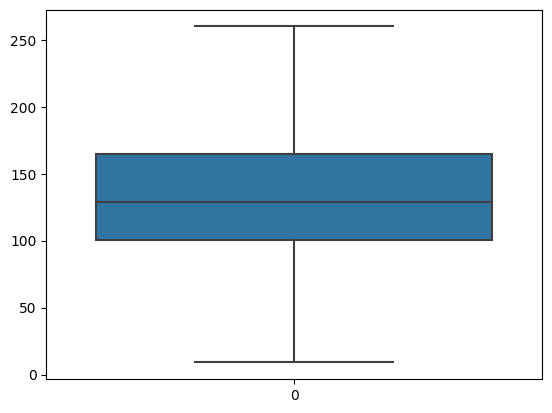

In [15]:
sns.boxplot(data['LoanAmount'])

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N


In [19]:
data['Gender'] = le.fit_transform(data['Gender'])
data['Married'] = le.fit_transform(data['Married'])
data['Education'] = le.fit_transform(data['Education'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Property_Area'] = le.fit_transform(data['Property_Area'])

In [20]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y


In [21]:
data.drop(columns = ['Loan_ID'],inplace = True)

In [22]:
# seperate x and y values

y = data['Loan_Status']
x = data.drop(columns = ['Loan_Status'])

In [23]:
# scaling
from sklearn.preprocessing import StandardScaler

In [24]:
scale = StandardScaler()

In [25]:
names = x.columns

In [26]:
x['Dependents'] = np.where(x['Dependents'] == "3+",4,x['Dependents'])

In [27]:
x = scale.fit_transform(x)

In [28]:
x

array([[ 0.47234264, -1.37208932, -0.6827291 , ...,  0.27985054,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  0.14245922, ...,  0.27985054,
         0.41173269, -1.31851281],
       [ 0.47234264,  0.72881553, -0.6827291 , ...,  0.27985054,
         0.41173269,  1.22329839],
       ...,
       [ 0.47234264,  0.72881553,  0.14245922, ...,  0.27985054,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  0.96764754, ...,  0.27985054,
         0.41173269,  1.22329839],
       [-2.11710719, -1.37208932, -0.6827291 , ...,  0.27985054,
        -2.42876026, -0.04760721]])

In [29]:
x = pd.DataFrame(x,columns = names)

In [30]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.682729,-0.528362,-0.392601,0.072991,-0.554487,0.161016,0.279851,0.411733,1.223298
1,0.472343,0.728816,0.142459,-0.528362,-0.392601,-0.134412,-0.038732,-0.175080,0.279851,0.411733,-1.318513
2,0.472343,0.728816,-0.682729,-0.528362,2.547117,-0.393747,-0.554487,-1.306830,0.279851,0.411733,1.223298
3,0.472343,0.728816,-0.682729,1.892641,-0.392601,-0.462062,0.251980,-0.321112,0.279851,0.411733,1.223298
4,0.472343,-1.372089,-0.682729,-0.528362,-0.392601,0.097728,-0.554487,0.062222,0.279851,0.411733,1.223298


In [31]:
# splitting the data into training and testing
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


In [34]:
# import the machine learning algorthim - classifications

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [35]:
# intialize the model
dtree = DecisionTreeClassifier()
rand = RandomForestClassifier()

Decision tree

In [36]:
# fit the training data with the model
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
# test the model with training and testing data
ytr = dtree.predict(x_train)

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [39]:
print(accuracy_score(y_train,ytr))

1.0


In [42]:
print(confusion_matrix(y_train,ytr))

[[157   0]
 [  0 334]]


In [40]:
ytt = dtree.predict(x_test)

In [41]:
print(accuracy_score(y_test,ytt))

0.7317073170731707


In [43]:
print(confusion_matrix(y_test,ytt))

[[22 13]
 [20 68]]


RandomForest




In [44]:
rand.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
ytr = rand.predict(x_train)

In [46]:
print(accuracy_score(y_train,ytr))

1.0


In [48]:
print(confusion_matrix(y_train,ytr))

[[157   0]
 [  0 334]]


In [47]:
ytt = rand.predict(x_test)

In [50]:
print(accuracy_score(y_test,ytt))

0.8455284552845529


In [49]:
print(confusion_matrix(y_test,ytt))

[[19 16]
 [ 3 85]]


Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logi = LogisticRegression()

In [53]:
logi.fit(x_train,y_train)

LogisticRegression()

In [54]:
ytr = logi.predict(x_train)

In [55]:
print(accuracy_score(y_train,ytr))

0.8024439918533605


In [56]:
ytt = logi.predict(x_test)

In [57]:
print(accuracy_score(y_test,ytt))

0.8617886178861789


KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier()

In [60]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [61]:
ytr = knn.predict(x_train)

In [62]:
print(accuracy_score(y_train,ytr))

0.8024439918533605


In [63]:
ytt = knn.predict(x_test)

In [64]:
print(accuracy_score(y_test,ytt))

0.8211382113821138


SVM

In [65]:
from sklearn.svm import SVC

In [66]:
svc = SVC()

In [67]:
svc.fit(x_train,y_train)

SVC()

In [68]:
ytr = svc.predict(x_train)

In [69]:
print(accuracy_score(y_train,ytr))

0.814663951120163


In [70]:
ytt = svc.predict(x_test)

In [71]:
print(accuracy_score(y_test,ytt))

0.8455284552845529


In [72]:
import pickle

In [73]:
pickle.dump(rand,open("model.pkl","wb"))

Regression

In [92]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y


In [93]:
data['Dependents'] = np.where(data['Dependents']=="3+",4,data['Dependents'])

In [97]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])

In [98]:
y = data['LoanAmount']
x = data.drop(columns = ['LoanAmount'])

In [99]:
names = x.columns

In [100]:
x = scale.fit_transform(x)

In [101]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2)

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [108]:
rand = RandomForestRegressor()
dec = DecisionTreeRegressor()

In [111]:
rand.fit(x_train,y_train)


RandomForestRegressor()

In [112]:
dec.fit(x_train,y_train)


DecisionTreeRegressor()

In [113]:
pred = rand.predict(x_test)
pred1 = dec.predict(x_test)

In [106]:
# RMSE - root mean square error

from sklearn.metrics import mean_squared_error

In [107]:
np.sqrt(mean_squared_error(y_test,pred))

41.60255798861137

In [114]:
np.sqrt(mean_squared_error(y_test,pred1))

59.94697827403294